# Chapter.4 Single-variate Linear Regression

## Programming Assignment.4-02 Loss Function with Contour Plot

Bias term이 포함된 SVLR model
$$\hat{y} = \theta_{1}x + \theta_{0}$$
에 대한 square error loss는 다음과 같습니다.
$$\mathcal{L} = (y - \hat{y})^{2} = (y - (\theta_{1}x + \theta_{0}))^{2}$$
즉, $\mathcal{L}$은 $\theta_{!}, \theta_{0}$에 대한 함수가 됩니다.

PA 4-02에서는 이 loss function의 모습을 이해하기 위해 다음과 같은 단계들을 이용합니다.  

<ul>
    <li> Step.1 Contour Plot of $\mathcal{L} = \theta_{1}^{2} + \theta_{0}^{2}$ </li>
    <li> Step.2 Contour Plot of $\mathcal{L} = a\theta_{1}^{2} + \theta_{0}^{2}$ </li>
    <li> Step.3 Contour Plot of $\mathcal{L} = \theta_{1}^{2} + \theta_{0}^{2} + c\theta_{1}\theta_{0}$ </li>
    <li> Step.4 Loss Functions in Reality </li>
</ul>

위 단계들을 통해 $\mathcal{L} = \theta_{1}^{2} + \theta_{0}^{2}$부터 $\mathcal{L} = (y - (\theta_{1}x + \theta_{0}))^{2}$에 한 단계씩 가까워지면서 loss function이 어떤 convexity를 가지는지 확인하고,  
뒤이은 PA에서 이 loss function을 이용해 GDM을 적용해봅니다.

In [162]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import axes3d

plt.style.use('seaborn')
np.random.seed(0)


***
## Step.1 Contour Plot of $\mathcal{L} = \theta_{1}^{2} + \theta_{0}^{2}$

먼저 가장 간단한 형태의 convex function인
$$\mathcal{L}(\theta_{1}, \theta_{0}) = \theta_{1}^{2} + \theta_{0}^{2}$$
에 대해 contour plot을 살펴봅니다. 

다음은 예제 코드로 
$$\mathcal{L}(\theta_{1}, \theta_{0}) = \theta_{1}^{2} + \theta_{0}^{2}$$
를 loss로 연산하고 wireframe을 이용해 3d plot을 그리는 과정입니다.

다음 셀을 실행시켜 loss의 모습을 살펴보세요.  
참고로 %matplotlib qt는 magic command로 3d plot을 회전하면서 확인할 수 있도록 외부 창에 그래프를 보여줍니다.

In [178]:
%matplotlib qt
th1_range = np.linspace(-2, 2, 100)
th0_range = np.linspace(-2, 2, 100)
Th1, Th0 = np.meshgrid(th1_range, th0_range)


loss = np.power(Th1,2) + np.power(Th0, 2)


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection = '3d')
ax.plot_wireframe(Th1, Th0, loss)
ax.set_xlabel(r'$\theta_{1}$', fontsize = 20)
ax.set_ylabel(r'$\theta_{0}$', fontsize = 20)
ax.set_zlabel(r'$\mathcal{L}$', fontsize = 20)


Text(0.5, 0, '$\\mathcal{L}$')

다음은 위의 loss function을 contour plot으로 나타내는 코드입니다.  
contour plot을 customizing해주기 위해 levels을 구해줍니다.  
이때 geomspace는 0이 들어갈 수 없기 때문에 최솟값이 0에 0.001을 더해주는 트릭을 사용합니다.  

참고로 %matplotlib inline은 내부창에 그래프를 그려줍니다.

다음의 셀을 실행시켜 3d loss function이 어떻게 2d contour plot으로 나타내어지는지 확인하세요.

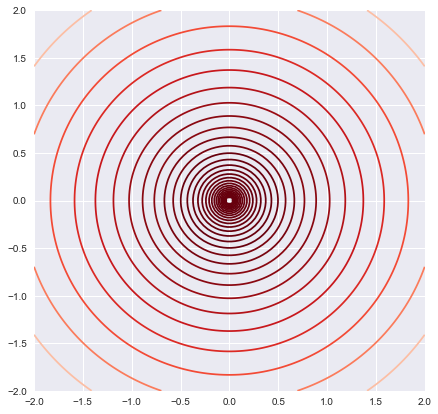

In [177]:
%matplotlib inline
th1_range = np.linspace(-2, 2, 100)
th0_range = np.linspace(-2, 2, 100)
Th1, Th0 = np.meshgrid(th1_range, th0_range)


loss = np.power(Th1,2) + np.power(Th0, 2)


fig, ax = plt.subplots(figsize = (7,7))
levels = np.geomspace(np.min(loss) + 0.001, np.max(loss), 30)
cmap = cm.get_cmap('Reds_r', lut = len(levels))
ax.contour(Th1, Th0, loss, levels = levels, cmap = cmap)

***
## Step.2 Contour Plot of $\mathcal{L} = a\theta_{1}^{2} + \theta_{0}^{2}$

실제 loss function $\mathcal{L} = (y - (\theta_{1}x + \theta_{0}))^{2}$를 전개하면 $x^{2} (\theta_{1})^{2} + (\theta_{0})^{2}$의 term이 있습니다.  
Step.2에서는 이 $x^{2}$가 loss function 변화에 어떤 영향을 미치는지 살펴봅니다.

***
**Programming**  
다음의 loss function
$$\mathcal{L}(\theta_{1}, \theta_{0}) = a\theta_{1}^{2} + \theta_{0}^{2}$$
에 대하여 a가 1보다 클 때, 즉 $x^{2}$가 1보다 클 때의 loss function을 확인하세요.  


In [ ]:
th1_range = np.linspace(-2, 2, 100)
th0_range = np.linspace(-2, 2, 100)
Th1, Th0 = np.meshgrid(th1_range, th0_range)

##### Start Your Code(Loss Function) #####
loss = 
##### End Your Code(Loss Function) #####

In [ ]:
# 2D Contour Plot
%matplotlib inline

fig, ax = plt.subplots(figsize = (7,7))
levels = np.geomspace(np.min(loss) + 0.01, np.max(loss), 30)
cmap = cm.get_cmap('Reds_r', lut = len(levels))
ax.contour(Th1, Th0, loss, levels = levels, cmap = cmap)

다음으로 a가 1보다 0보다 크고 1보다 작을 때, 즉 $x^{2}$가 0보다 크고 1보다 작을 때 위의 과정을 반복하고,  
어떤 변화가 생기는지 확인하세요.

In [ ]:
##### Start Your Code(Loss Function) #####
loss = 
##### End Your Code(Loss Function) #####

In [ ]:
# 3D Wireframe Plot
%matplotlib qt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection = '3d')
ax.plot_wireframe(Th1, Th0, loss)
ax.set_xlabel(r'$\theta_{1}$', fontsize = 20)
ax.set_ylabel(r'$\theta_{0}$', fontsize = 20)
ax.set_zlabel(r'$\mathcal{L}$', fontsize = 20)

In [ ]:
# 2D Contour Plot
%matplotlib inline

fig, ax = plt.subplots(figsize = (7,7))
levels = np.geomspace(np.min(loss) + 0.01, np.max(loss), 30)
cmap = cm.get_cmap('Reds_r', lut = len(levels))
ax.contour(Th1, Th0, loss, levels = levels, cmap = cmap)

***
## Step.3 Contour Plot of $\mathcal{L} = \theta_{1}^{2} + \theta_{0}^{2} + c\theta_{1}\theta_{0}$


실제 loss function $\mathcal{L} = (y - (\theta_{1}x + \theta_{0}))^{2}$를 전개하면 $-2xy\theta_{1}$의 term이 있습니다.  
Step.3에서는 이 term이 loss function 모양에 어떤 영향을 미치는지 살펴봅니다.

***
**Programming**  
다음의 loss function
$$\mathcal{L}(\theta_{1}, \theta_{0}) = \theta_{1}^{2} + \theta_{0}^{2} + c\theta_{1}\theta_{0}$$
에 대해 loss function의 개형을 확인하세요.  
이때 주의할 점은 c는 -2에서부터 2사이의 값으로 확인해야 합니다. 그 이유는 $\theta_{1}\theta_{0}$ term은 $(\theta_{1} + \theta_{0})^{2}$의 전개식에서 나온 term이기 때문입니다.

In [ ]:
th1_range = np.linspace(-2, 2, 100)
th0_range = np.linspace(-2, 2, 100)
Th1, Th0 = np.meshgrid(th1_range, th0_range)

##### Start Your Code(Loss Function) #####
loss = 
##### End Your Code(Loss Function) #####

In [ ]:
# 3D Wireframe Plot
%matplotlib qt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection = '3d')
ax.plot_wireframe(Th1, Th0, loss)
ax.set_xlabel(r'$\theta_{1}$', fontsize = 20)
ax.set_ylabel(r'$\theta_{0}$', fontsize = 20)
ax.set_zlabel(r'$\mathcal{L}$', fontsize = 20)

In [ ]:
# 2D Contour Plot
%matplotlib inline

fig, ax = plt.subplots(figsize = (7,7))
levels = np.geomspace(np.min(loss) + 0.01, np.max(loss), 30)
cmap = cm.get_cmap('Reds_r', lut = len(levels))
ax.contour(Th1, Th0, loss, levels = levels, cmap = cmap)

***
## Step.4 Loss Functions in Reality

Step.3까지의 내용을 이용하면, 최종적인 loss function
$$\mathcal{L}(\theta_{1},\theta_{0})=(y - (\theta_{1} x + \theta_{0}))^{2}$$
$$=
x^{2} (\theta_{1})^{2} + (\theta_{0})^{2} -2xy\theta_{1}  - 2y\theta_{0} + 2x\theta_{1}\theta_{0} + y^{2}$$
의 모습은 

<img src='./imgs/4_02_01.png' width=400>

위와 같이 이상적인 convex의 형태가 나오지 않는다는 것을 확인했습니다.

Step.4에서는 실제 loss function의 개형을 확인해봅니다.

***
**Programming**  
$y = x + 3$에서 만들어진 data point $(x,y) = (1,4)$의 loss function을 시각화하세요.  
그리고 시각화된 loss function이 convex함을 확인하세요.

In [ ]:
##### Start Your Code(Data Sample Preparation) #####
x = 
y = 
##### Start Your Code(Data Sample Preparation) #####

th1_range = np.linspace(-1, 3, 100)
th0_range = np.linspace(1, 5, 100)
Th1, Th0 = np.meshgrid(th1_range, th0_range)

##### Start Your Code(Loss Function) #####
loss = 
##### End Your Code(Loss Function) #####

%matplotlib inline
fig, ax = plt.subplots(figsize = (7,7))
levels = np.geomspace(np.min(loss) + 0.01, np.max(loss), 30)
cmap = cm.get_cmap('Reds_r', lut = len(levels))
ax.contour(Th1, Th0, loss, levels = levels, cmap = cmap)

***
**Programming**  
$y = x + 3$에서 만들어진 data sample들을 포함하는 다음과 같은 dataset이 주어졌다고 가정합니다.
$$\mathcal{D} = \{ (x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), (x^{(3)}, y^{(3)}), (x^{(4)}, y^{(4)}), (x^{(5)}, y^{(5)}), (x^{(6)}, y^{(6)}) \} =
\{ (-2,1), (-1,2), (0,3), (1,4), (2,5), (5,8) \}
$$

이때 각 data sample들에 대한 loss function을 시각화하고 비교하세요.  
그리고 차이점이 생기는 이유를 수학적으로 증명해보세요.

In [ ]:
th1_range = np.linspace(-1, 3, 100)
th0_range = np.linspace(1, 5, 100)
Th1, Th0 = np.meshgrid(th1_range, th0_range)

##### Start Your Code(Dataset Preparation) #####
x_data = 
y_data = 
##### End Your Code(Dataset Preparation) #####

fig, axes = plt.subplots(2, 3, figsize = (15,10))
for ax_idx, (ax, x, y) in enumerate(zip(axes.flat, x_data, y_data)):
    ##### Start Your Code(Loss Function) #####
    loss = 
    ##### End Your Code(Loss Function) #####
    
    levels = np.geomspace(np.min(loss) + 0.01, np.max(loss), 30)
    cmap = cm.get_cmap('Reds_r', lut = len(levels))
    ax.contour(Th1, Th0, loss, levels = levels, cmap = cmap)